In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("FLETES LARRAZ 2024.xlsx", sheet_name="ENERO 2025")

In [4]:

df.drop(0,inplace=True)
df.drop(1,inplace=True)
df.drop(3,inplace=True)
df.drop(4,inplace=True)
df.drop(columns="Unnamed: 0",inplace=True)
df.drop(columns="Unnamed: 11",inplace=True)
df.drop(columns="Unnamed: 12",inplace=True)
df.drop(columns="Unnamed: 13",inplace=True)
df.drop(columns="Unnamed: 15",inplace=True)
df.drop(columns="Unnamed: 16",inplace=True)



In [5]:
df= df.rename(columns=df.iloc[0]).drop(df.index[0]).reset_index(drop=True)


In [6]:
df = df.drop(df.columns[-2:], axis=1)

In [7]:
df = df[df["PRECIO-FLETE"]!=0]

In [8]:
df

,FECHA,PLANILLA,CAMIÓN,CLIENTE,BULTOS,LOCALIDAD,EXPRESO,REMITOS,PRECIO-FLETE,PRECIO-OTROS,VALOR DECLARADO
1,NaN,NaN,NaN,Natural Snack,24,Buenos Aires,Larraz,18278,55500,NaN,906518.4
2,NaN,NaN,NaN,Ventimiglia,20,CABA,Vesprini,18272,55500,NaN,785322
3,NaN,NaN,NaN,Cencosud,133,CABA,Amicci,18283,55500,NaN,3553680
4,NaN,NaN,NaN,Talamona,20,CABA,Piloni,18284,55500,NaN,642733
5,NaN,NaN,NaN,Mamuschka,11,CABA,Imaz,18269,55500,NaN,1324781.97
...,...,...,...,...,...,...,...,...,...,...,...
116,NaN,NaN,NaN,Millan,40,CABA,Amicci,18417,55500,NaN,2720000
117,NaN,NaN,NaN,Manufacturas Sintacc,8,CABA,Santulli,18419,55500,NaN,292764.8
119,NaN,NaN,NaN,Staropoli Pablo,70,Moron,Larraz,18416,195800,NaN,2644012
120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,473300,NaN,9046888.59


In [9]:
df['nro-camion'] = df['FECHA'].notna().cumsum()

In [10]:
columnas_nuevo_orden = ['nro-camion', 'FECHA', 'PLANILLA', 'CAMIÓN', 'CLIENTE', 'BULTOS', 'LOCALIDAD', 'EXPRESO ', 'REMITOS', 'PRECIO-FLETE', 'PRECIO-OTROS', 'VALOR DECLARADO']
df = df[columnas_nuevo_orden]

In [11]:
promedio_precio = df.groupby("nro-camion")["PRECIO-FLETE"].transform("mean")
df["PROMEDIO POR CAMION"] = promedio_precio

C:\Users\User\AppData\Local\Temp\ipykernel_13012\2988780511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PROMEDIO POR CAMION"] = promedio_precio


In [12]:
localidades = df.value_counts("LOCALIDAD")
df_localidades= localidades.to_frame(name="VIAJES")
df_localidades["COSTO TOTAL"] = df.groupby("LOCALIDAD")["PROMEDIO POR CAMION"].agg("sum")
df_localidades

,VIAJES,COSTO TOTAL
LOCALIDAD,,
CABA,44,4152861.190476
Buenos Aires,14,1364316.666667
Moron,5,553648.571429
Ciudadela,3,315843.333333
Avellaneda,2,251300.0
Rosario,2,708000.0
Sarandi,2,175680.0
Burzaco,1,87840.0
Gerli,1,90575.0


In [13]:
df_localidades["COSTO POR VIAJE"] = df_localidades["COSTO TOTAL"]/df_localidades["VIAJES"]
df_localidades

,VIAJES,COSTO TOTAL,COSTO POR VIAJE
LOCALIDAD,,,
CABA,44,4152861.190476,94383.208874
Buenos Aires,14,1364316.666667,97451.190476
Moron,5,553648.571429,110729.714286
Ciudadela,3,315843.333333,105281.111111
Avellaneda,2,251300.0,125650.0
Rosario,2,708000.0,354000.0
Sarandi,2,175680.0,87840.0
Burzaco,1,87840.0,87840.0
Gerli,1,90575.0,90575.0


In [14]:
import matplotlib.ticker as mticker

df_localidades.reset_index(inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_13012\4069108512.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_localidades, x="LOCALIDAD", y="VIAJES", ax=ax[0],palette="gray")
C:\Users\User\AppData\Local\Temp\ipykernel_13012\4069108512.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(df_localidades["LOCALIDAD"], rotation=90)
C:\Users\User\AppData\Local\Temp\ipykernel_13012\4069108512.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(df_localidades["LOCALIDAD"].unique(), rotation=90)


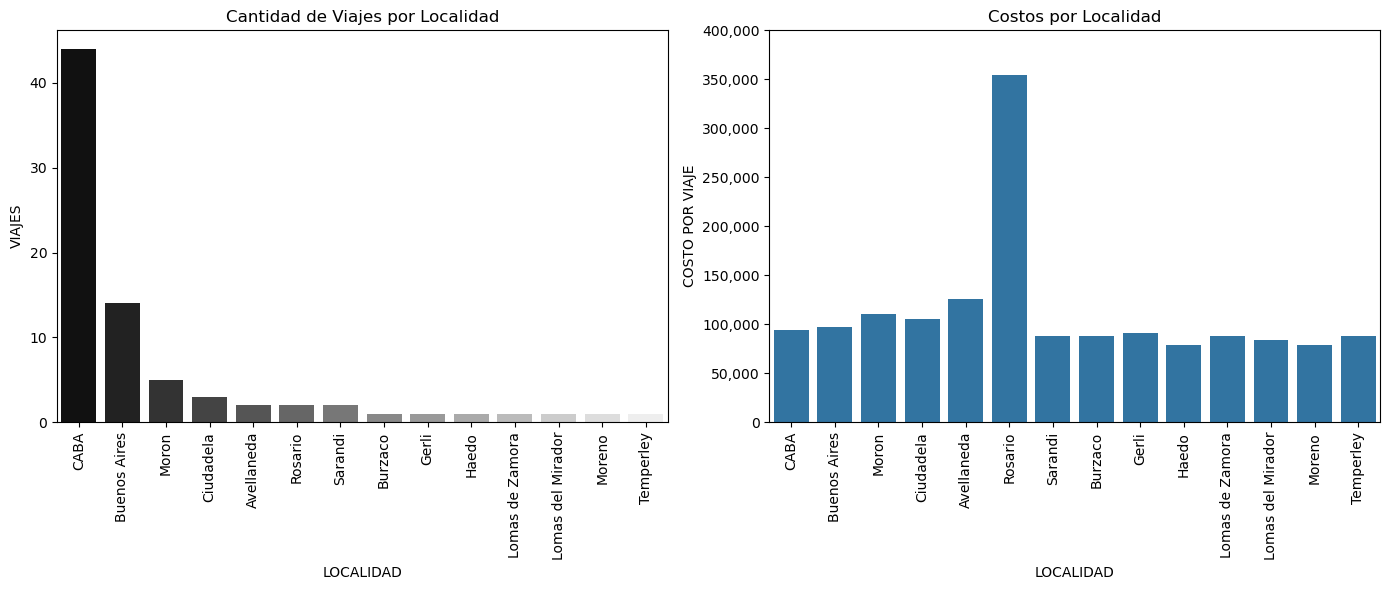

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))  


sns.barplot(data=df_localidades, x="LOCALIDAD", y="VIAJES", ax=ax[0],palette="gray")
ax[0].set_title("Cantidad de Viajes por Localidad")
ax[0].set_xticklabels(df_localidades["LOCALIDAD"], rotation=90)


#df_melted = df_localidades.melt(id_vars=["LOCALIDAD"], 
#                                value_vars=["COSTO TOTAL", "COSTO POR VIAJE"], 
#                                var_name="Tipo de Costo", 
#                                value_name="Valor")

sns.barplot(x="LOCALIDAD", y="COSTO POR VIAJE", data=df_localidades, ax=ax[1])
ax[1].set_title("Costos por Localidad")
ax[1].set_xticklabels(df_localidades["LOCALIDAD"].unique(), rotation=90)
ax[1].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
ax[1].set_ylim(0,400000)

plt.tight_layout()
plt.show()

In [16]:
df_viajes = df[df["LOCALIDAD"] != "rosario"].value_counts("nro-camion").to_frame(name="cantidad_viajes")
df_viajes

,cantidad_viajes
nro-camion,
20,7
9,7
0,6
3,6
16,6
12,6
2,5
4,5
8,5


In [17]:
df_viajes= df_viajes.groupby('cantidad_viajes').size().reset_index(name='cantidad_camiones')
df_viajes.set_index("cantidad_viajes",inplace=True)
df_viajes.reset_index(inplace=True)
df_viajes

,cantidad_viajes,cantidad_camiones
0,1,5
1,2,4
2,3,1
3,4,2
4,5,4
5,6,4
6,7,2


In [18]:
df_rosario = df[df["LOCALIDAD"]=="rosario"]
df_rosario = df_rosario.value_counts("nro-camion").to_frame(name="cantidad_viajes")
df_rosario= df_rosario.groupby('cantidad_viajes').size().reset_index(name='cantidad_camiones')
df_rosario.set_index("cantidad_viajes",inplace=True)


In [19]:
df

,nro-camion,FECHA,PLANILLA,CAMIÓN,CLIENTE,BULTOS,LOCALIDAD,EXPRESO,REMITOS,PRECIO-FLETE,PRECIO-OTROS,VALOR DECLARADO,PROMEDIO POR CAMION
1,0,NaN,NaN,NaN,Natural Snack,24,Buenos Aires,Larraz,18278,55500,NaN,906518.4,55500.0
2,0,NaN,NaN,NaN,Ventimiglia,20,CABA,Vesprini,18272,55500,NaN,785322,55500.0
3,0,NaN,NaN,NaN,Cencosud,133,CABA,Amicci,18283,55500,NaN,3553680,55500.0
4,0,NaN,NaN,NaN,Talamona,20,CABA,Piloni,18284,55500,NaN,642733,55500.0
5,0,NaN,NaN,NaN,Mamuschka,11,CABA,Imaz,18269,55500,NaN,1324781.97,55500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,20,NaN,NaN,NaN,Millan,40,CABA,Amicci,18417,55500,NaN,2720000,135228.571429
117,20,NaN,NaN,NaN,Manufacturas Sintacc,8,CABA,Santulli,18419,55500,NaN,292764.8,135228.571429
119,20,NaN,NaN,NaN,Staropoli Pablo,70,Moron,Larraz,18416,195800,NaN,2644012,135228.571429
120,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,473300,NaN,9046888.59,135228.571429


In [20]:
df_localidades["VALOR DECLARADO POR DESTINO"] = df_localidades["LOCALIDAD"].map(
    df.groupby("LOCALIDAD")["VALOR DECLARADO"].sum()
)

In [21]:
df_localidades["PORCENTAJE VALOR DECLARADO"] = round(df_localidades["COSTO TOTAL"]/df_localidades["VALOR DECLARADO POR DESTINO"]*100,1)

In [22]:
df_localidades

,LOCALIDAD,VIAJES,COSTO TOTAL,COSTO POR VIAJE,VALOR DECLARADO POR DESTINO,PORCENTAJE VALOR DECLARADO
0,CABA,44,4152861.190476,94383.208874,87548074.61,4.743521
1,Buenos Aires,14,1364316.666667,97451.190476,35018547.25,3.895983
2,Moron,5,553648.571429,110729.714286,13774414.3,4.019398
3,Ciudadela,3,315843.333333,105281.111111,17874829.65,1.766973
4,Avellaneda,2,251300.0,125650.0,5301452.25,4.740211
5,Rosario,2,708000.0,354000.0,2436346.2,29.059909
6,Sarandi,2,175680.0,87840.0,2062178.1,8.519148
7,Burzaco,1,87840.0,87840.0,4279811.2,2.052427
8,Gerli,1,90575.0,90575.0,689571.5,13.134969
9,Haedo,1,78883.333333,78883.333333,1233738.32,6.393846


C:\Users\User\AppData\Local\Temp\ipykernel_13012\1468654405.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,0].set_xticklabels(df_localidades["LOCALIDAD"], rotation=90)
C:\Users\User\AppData\Local\Temp\ipykernel_13012\1468654405.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,1].set_xticklabels(df_localidades["LOCALIDAD"].unique(), rotation=90)
C:\Users\User\AppData\Local\Temp\ipykernel_13012\1468654405.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,0].set_xticklabels(df_localidades["LOCALIDAD"].unique(), rotation=90)


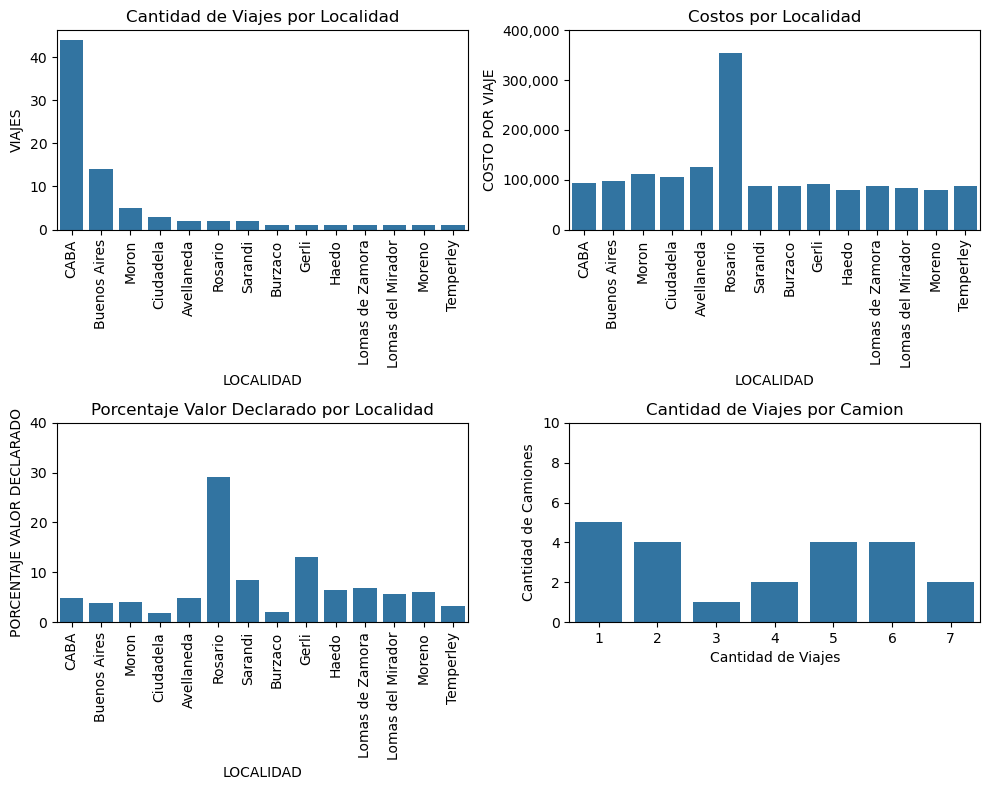

In [23]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))  


sns.barplot(data=df_localidades, x="LOCALIDAD", y="VIAJES", ax=ax[0,0])
ax[0,0].set_title("Cantidad de Viajes por Localidad")
ax[0,0].set_xticklabels(df_localidades["LOCALIDAD"], rotation=90)


#df_melted = df_localidades.melt(id_vars=["LOCALIDAD"], 
#                                value_vars=["COSTO TOTAL", "COSTO POR VIAJE"], 
#                                var_name="Tipo de Costo", 
#                                value_name="Valor")

sns.barplot(x="LOCALIDAD", y="COSTO POR VIAJE", data=df_localidades, ax=ax[0,1])
ax[0,1].set_title("Costos por Localidad")
ax[0,1].set_xticklabels(df_localidades["LOCALIDAD"].unique(), rotation=90)
ax[0,1].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
ax[0,1].set_ylim(0,400000)

sns.barplot(x="LOCALIDAD", y="PORCENTAJE VALOR DECLARADO", data= df_localidades, ax=ax[1,0])
ax[1,0].set_title("Porcentaje Valor Declarado por Localidad")
ax[1,0].set_xticklabels(df_localidades["LOCALIDAD"].unique(), rotation=90)
ax[1,0].set_ylim(0,40)

sns.barplot(data=df_viajes, x="cantidad_viajes", y="cantidad_camiones",ax=ax[1,1])
ax[1,1].set_title("Cantidad de Viajes por Camion")
ax[1,1].set_ylim(0,10)
ax[1,1].set_ylabel("Cantidad de Camiones")
ax[1,1].set_xlabel("Cantidad de Viajes")

plt.tight_layout()
plt.show()